<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-Pytorch/blob/main/Looking_Into_Deep_Learning_Models_1_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from torchvision import models

In [48]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [49]:
alexnet = models.AlexNet()

In [50]:
resnet = models.resnet101(pretrained=True)

In [51]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# PreProcessing the images
=> so that they are the right size and so that their values(colors) sit roughly in the same numerical range.
- these values must match to what was presented to the network during training, if we want the network to produce meaningful answers

In [52]:
from torchvision import transforms
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.485,0.456,0.4061],
                                     std=[0.229,0.224,0.225]
                                 )
])

In [53]:
from PIL import Image

In [54]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [55]:
mkdir data/p1ch2

mkdir: cannot create directory ‘data/p1ch2’: File exists


In [56]:
!wget -O data/p1ch2/bobby.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ46mwcw-Ny_gmEwlS9vMPxH8WoBrFR6exV2A&usqp=CAU 

--2021-11-05 02:40:38--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ46mwcw-Ny_gmEwlS9vMPxH8WoBrFR6exV2A
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.1.206, 2607:f8b0:4004:801::200e
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7281 (7.1K) [image/jpeg]
Saving to: ‘data/p1ch2/bobby.jpg’

data/p1ch2/bobby.jp 100%[===================>]   7.11K  --.-KB/s    in 0s      

2021-11-05 02:40:38 (67.9 MB/s) - ‘data/p1ch2/bobby.jpg’ saved [7281/7281]



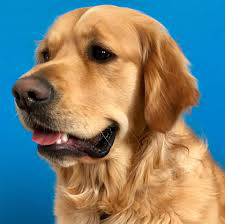

In [57]:
img = Image.open("data/p1ch2/bobby.jpg")
img

In [58]:
# img.show() # to see the picture if on jupyter notebook

In [59]:
img_t = preprocess(img)
img_t

tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.1008, -2.1008, -2.1008],
         [-2.0837, -2.0837, -2.0837,  ..., -2.1179, -2.1179, -2.1179],
         [-2.0665, -2.0665, -2.0665,  ..., -2.1008, -2.0837, -2.0837],
         ...,
         [-2.0665, -2.0665, -2.0494,  ...,  1.7694,  1.8722,  1.9064],
         [-2.0837, -2.0837, -2.0665,  ...,  1.8722,  1.9920,  2.0263],
         [-2.0837, -2.0837, -2.0837,  ...,  1.9749,  1.9920,  2.0263]],

        [[ 0.4153,  0.4153,  0.4153,  ...,  0.4153,  0.4153,  0.4153],
         [ 0.4153,  0.4153,  0.4153,  ...,  0.3978,  0.3978,  0.3978],
         [ 0.4328,  0.4328,  0.4328,  ...,  0.4153,  0.4153,  0.4153],
         ...,
         [-0.4076, -0.4076, -0.4251,  ...,  1.0280,  1.1331,  1.1681],
         [-0.4251, -0.4251, -0.4426,  ...,  1.0805,  1.1856,  1.2206],
         [-0.4251, -0.4251, -0.4426,  ...,  1.1856,  1.1856,  1.2381]],

        [[ 1.7332,  1.7332,  1.7332,  ...,  1.8030,  1.8378,  1.8378],
         [ 1.7332,  1.7332,  1.7332,  ...,  1

In [60]:
img_t.shape

torch.Size([3, 224, 224])

In [61]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

# INFERENCE:
- the process of running a trained model on a new data is called **inference** in deep learning circles.

- for this we need to put the network in eval mode
  - if we forget to do that some pretrained models, like *batch normalization* and *dropout* will not produce meaningful answers

In [62]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [63]:
out = resnet(batch_t)
out.shape

torch.Size([1, 1000])

In [64]:
!wget -O data/p1ch2/imagenet_classes.txt https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

--2021-11-05 02:40:39--  https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15543 (15K) [text/plain]
Saving to: ‘data/p1ch2/imagenet_classes.txt’

data/p1ch2/imagenet 100%[===================>]  15.18K  --.-KB/s    in 0s      

2021-11-05 02:40:39 (90.3 MB/s) - ‘data/p1ch2/imagenet_classes.txt’ saved [15543/15543]



In [65]:
with open('data/p1ch2/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [66]:
labels[0:10]

["List of ImageNet class numbers and names as used in Keras' pre-trained models.",
 '',
 'Extracted from https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json',
 '',
 '0, tench',
 '1, goldfish',
 '2, great_white_shark',
 '3, tiger_shark',
 '4, hammerhead',
 '5, electric_ray']

In [67]:
labels[4]

'0, tench'

In [68]:
labels = labels[4:]

In [69]:
_, index = torch.max(out, 1)
index

tensor([207])

In [70]:
index[0]

tensor(207)

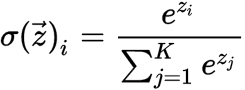

In [71]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] *100
percentage[207]

tensor(97.0675, grad_fn=<SelectBackward>)

In [72]:
labels[index[0]][5:] , percentage[index[0]].item()

('golden_retriever', 97.06747436523438)

In [73]:
_, indices = torch.sort(out, descending=True)
[(labels[idx][5:], percentage[idx].item()) for idx in indices[0][:5]]

[('golden_retriever', 97.06747436523438),
 ('Labrador_retriever', 1.7967846393585205),
 ('Sussex_spaniel', 0.34070247411727905),
 ('tennis_ball', 0.2038867473602295),
 ('cocker_spaniel', 0.16939662396907806)]